<a href="https://colab.research.google.com/github/fmakkawi/Data110/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required packages (run once)
!pip install requests pandas matplotlib wordcloud

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime, timedelta

# Set NewsAPI key
api_key = "c5b15276fea947f6b714e89e70bff4e5"

# Define dates
today = datetime.today().strftime('%Y-%m-%d')
last_month = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')

# Define NewsAPI topics
topics = {
    "AI": f"https://newsapi.org/v2/everything?q=artificial+intelligence&from={last_month}&language=en&apiKey={api_key}",
    "Today Headlines": f"https://newsapi.org/v2/top-headlines?language=en&apiKey={api_key}",
    "Climate": f"https://newsapi.org/v2/everything?q=climate+change&from={last_month}&language=en&apiKey={api_key}",
    "Technology": f"https://newsapi.org/v2/everything?q=technology&from={last_month}&language=en&apiKey={api_key}",
}

# Fetch NewsAPI data
all_articles = []
for topic, url in topics.items():
    response = requests.get(url)
    data = response.json()
    if "articles" in data:
        for article in data["articles"]:
            all_articles.append({
                "Topic": topic,
                "Title": article["title"],
                "Source": article["source"]["name"],
                "PublishedAt": article["publishedAt"]
            })

# Create DataFrame
df = pd.DataFrame(all_articles)
df.head()



,Topic,Title,Source,PublishedAt
0,AI,"Microsoft, OpenAI, and a US Teachers’ Union Ar...",Wired,2025-07-08T11:30:08Z
1,AI,Delta Air Lines is using AI to set the maximum...,The Verge,2025-07-18T10:50:57Z
2,AI,Errors found in US judge’s withdrawn decision ...,The Verge,2025-07-25T10:30:01Z
3,AI,Trump is bringing back the AI law moratorium,The Verge,2025-07-23T17:46:34Z
4,AI,Meta snubs the EU’s voluntary AI guidelines,The Verge,2025-07-21T11:13:49Z


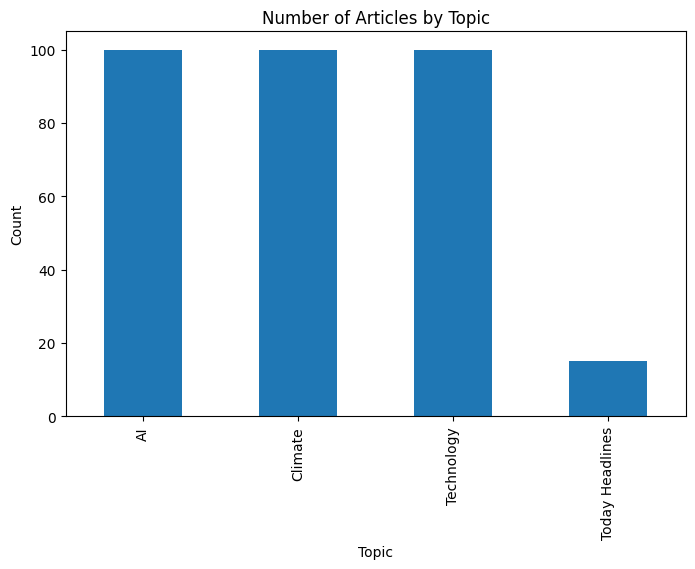

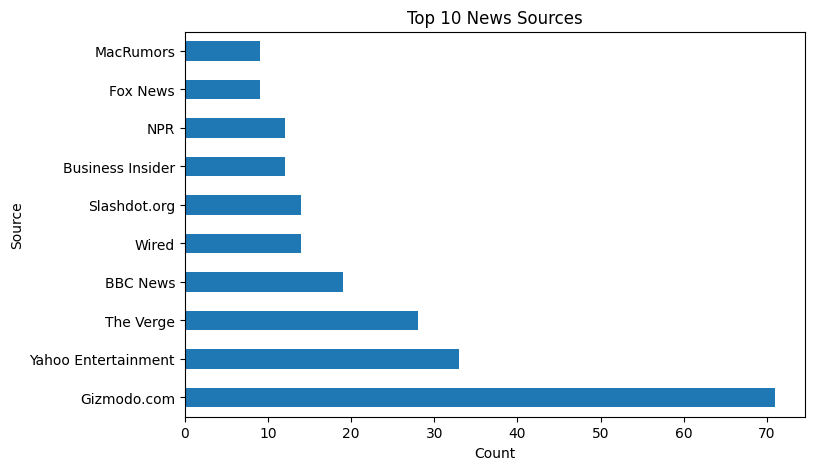

In [3]:
# Chart 1: Number of Articles by Topic
df['Topic'].value_counts().plot(kind='bar', title="Number of Articles by Topic", figsize=(8,5))
plt.ylabel("Count")
plt.show()

# Chart 2: Top 10 Sources
df['Source'].value_counts().head(10).plot(kind='barh', title="Top 10 News Sources", figsize=(8,5))
plt.xlabel("Count")
plt.show()


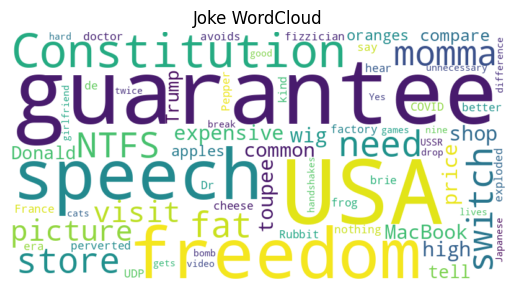

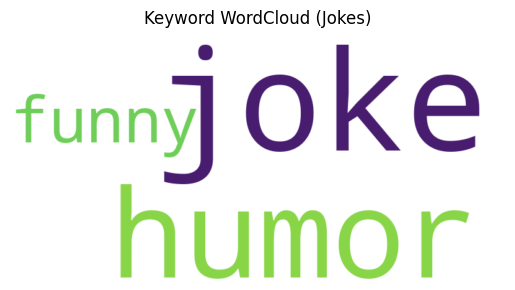

In [4]:
# JokeAPI (no API key needed)
joke_url = "https://v2.jokeapi.dev/joke/Any?amount=10"
joke_response = requests.get(joke_url)
joke_data = joke_response.json()
jokes = []

# Extract jokes
for joke in joke_data.get("jokes", []):
    if joke["type"] == "single":
        jokes.append(joke["joke"])
    else:
        jokes.append(joke["setup"] + " " + joke["delivery"])

# Combine jokes into one string
joke_text = " ".join(jokes)

# WordCloud 1: All Joke Text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joke_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Joke WordCloud")
plt.show()

# WordCloud 2: Filtered by keywords
keywords = ['funny', 'laugh', 'joke', 'silly', 'pun', 'humor']
filtered = " ".join([w for w in joke_text.split() if w.lower() in keywords])
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(filtered or 'joke humor funny')
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword WordCloud (Jokes)")
plt.show()
